We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [185]:
import pandas as pd
import numpy as np
airline = pd.read_csv(r'C:\Users\gixi_\Ironhack\DAFT_212\module_2\Lab_21_Time-Series-Models/airlines_passengers.csv')

Let’s display the first five rows of data

In [186]:
airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [187]:
airline.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [188]:
airline['Month'] = pd.to_datetime(airline.Month, format='%Y/%m/%d')
airline.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


The next thing we can do is convert the month column to an index. 


In [189]:
airline.set_index('Month', inplace = True)
airline

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

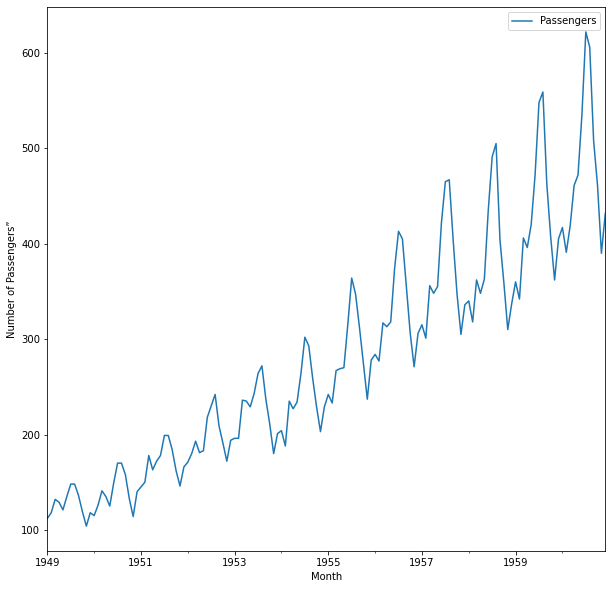

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
airline.plot()
plt.ylabel("Number of Passengers”")
plt.show()


Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [191]:
from statsmodels.tsa.stattools import adfuller

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [192]:
result = adfuller(airline.Passengers,autolag='AIC')
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

(0.8153688792060512, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Store our results in a dataframe display it

Explain the results

P value is bigger than 0.05 so we cannot reject the null hypothesis. So the time series is not stationary. 

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

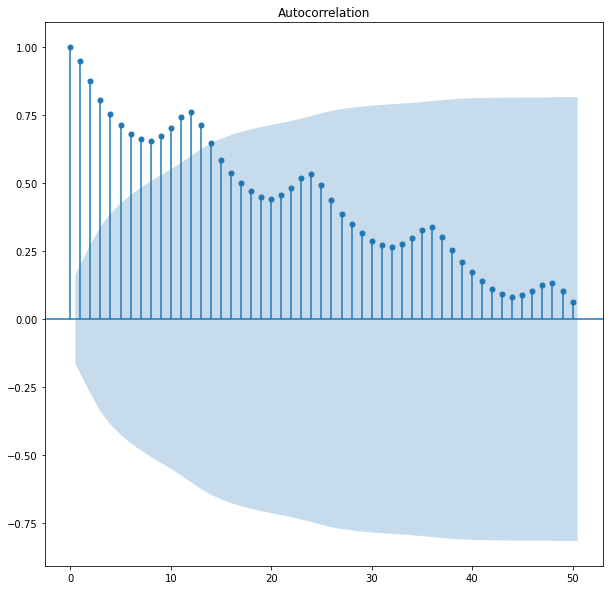

In [193]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(airline, lags=50)
plt.show()

Calculate partial autocorrelation

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


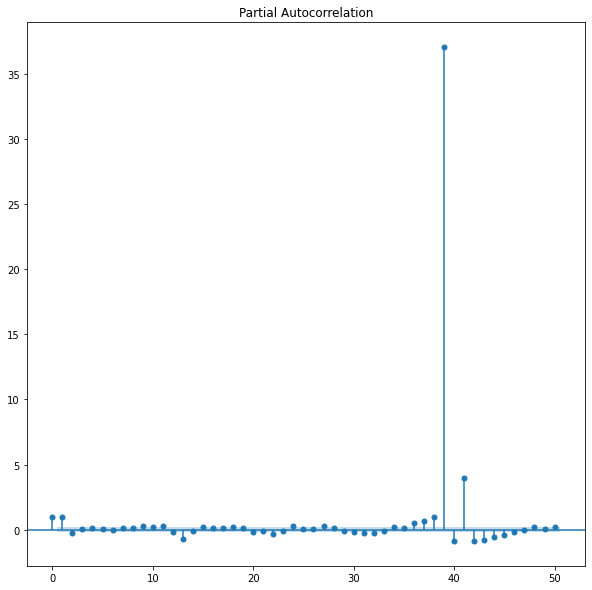

In [194]:
figsize=(16,3)
plot_pacf(airline, alpha =0.05, lags=50)
plt.show()


Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [195]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline, model='additive', freq=60)

<ipython-input-195-ff1ec90ebba5>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(airline, model='additive', freq=60)


Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


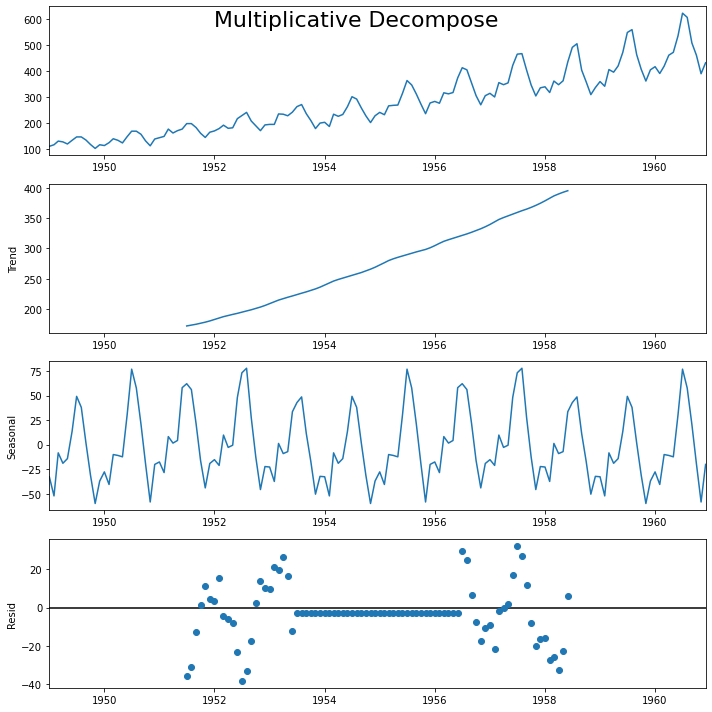

In [196]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Multiplicative Decompose', fontsize=22)

plt.show()


Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [197]:
airline1 = airline.copy()
airline1['Passengers'] = airline1['Passengers'].diff()
airline1 = airline1.drop(airline.index[0])
result = adfuller(airline1.Passengers,autolag='AIC')
print(result)
print('p-value: %f' % result[1])

(-2.829266824169998, 0.054213290283825676, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)
p-value: 0.054213


MA(1)

In [198]:
from statsmodels.tsa.arima.model import ARIMA
ma1 = ARIMA(airline1, order = (0,0,1))
result_ma1 = ma1.fit()

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Display the output

In [199]:
print(result_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -696.414
Date:                Tue, 29 Mar 2022   AIC                           1398.827
Time:                        11:50:48   BIC                           1407.716
Sample:                    02-01-1949   HQIC                          1402.439
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4220      3.735      0.648      0.517      -4.898       9.742
ma.L1          0.4012      0.077      5.202      0.000       0.250       0.552
sigma2       993.2318    107.912      9.204      0.0

MA(2)

In [200]:
ma2 = ARIMA(airline1, order = (0,0,2))
result_ma2 = ma2.fit()

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Display the output

In [201]:
print(result_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -695.193
Date:                Tue, 29 Mar 2022   AIC                           1398.386
Time:                        11:50:48   BIC                           1410.237
Sample:                    02-01-1949   HQIC                          1403.201
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4331      2.890      0.842      0.400      -3.230       8.097
ma.L1          0.3735      0.072      5.161      0.000       0.232       0.515
ma.L2         -0.2830      0.061     -4.670      0.0

AR(2)

In [202]:
ar2 = ARIMA(airline1, order = (2,0,0))
results_ar2 = ar2.fit()
print(results_ar2.summary())

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -694.988
Date:                Tue, 29 Mar 2022   AIC                           1397.975
Time:                        11:50:48   BIC                           1409.827
Sample:                    02-01-1949   HQIC                          1402.791
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4075      3.125      0.770      0.441      -3.717       8.532
ar.L1          0.3792      0.088      4.331      0.000       0.208       0.551
ar.L2         -0.2314      0.064     -3.627      0.0

ARMA (?,?)

In [203]:
arma22 = ARIMA(airline1, order = (2,0,2))
results_arma22 = arma22.fit()

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Display the output

In [204]:
print(results_arma22.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -666.022
Date:                Tue, 29 Mar 2022   AIC                           1344.044
Time:                        11:50:49   BIC                           1361.821
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5314      0.735      3.444      0.001       1.091       3.972
ar.L1          1.6478      0.028     58.897      0.000       1.593       1.703
ar.L2         -0.9095      0.025    -36.756      0.0

ARIMA(?,?)

In [205]:
arima212 = ARIMA(airline, order = (2,1,2))
results_arima212 = arima212.fit()

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Display the output

In [206]:
print(results_arima212.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 29 Mar 2022   AIC                           1353.347
Time:                        11:50:49   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.421      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.863      0.0

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [207]:
models_name = ['MA1', 'MA2', 'AR2', 'ARMA','ARIMA']
results = [result_ma1,result_ma2,results_ar2,results_arma22,results_arima212]
from sklearn.metrics import mean_squared_error
rmse = []
for i in range(0, len(models_name)):
    if i != 4:
        r = mean_squared_error(y_true = airline1, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
    else:
        r = mean_squared_error(y_true = airline, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
rmse

[31.515783318392,
 31.216723895379147,
 31.199716261028676,
 25.05761011031715,
 27.643055812434707]

In [211]:
results_rmse = list(zip(models_name,rmse))
summary = pd.DataFrame(results_rmse, columns=['models_name','rmse'])

Calculate AIC

In [212]:
aic = []
for i in range(0, len(models_name)):
    if i != 4:
        a = results[i].aic
        aic.append(a)
    else:
         a= results[i].aic
         aic.append(a)
aic

[1398.827109868048,
 1398.38553179146,
 1397.9751521920011,
 1344.0436357649194,
 1353.3466405317645]

In [213]:
summary['aic'] = aic
summary

,models_name,rmse,aic
0,MA1,31.515783,1398.827110
1,MA2,31.216724,1398.385532
2,AR2,31.199716,1397.975152
3,ARMA,25.057610,1344.043636
4,ARIMA,27.643056,1353.346641


#The smaller the AIC value, the better the model fit.